In [1]:
# importing some useful modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

image_size = 28 
# In case our working directory is not in the same confirguration as given above, change the data_path variable to point to the dataset
data_path = "./QSVM_dataset/"
train_data = np.loadtxt(data_path + "mnist_train.csv", delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", delimiter=",") 

In [2]:
print("Number of training datapoints: {}".format(train_data.shape[0]))
print("Number of testing datapoints: {}".format(test_data.shape[0]))

Number of training datapoints: 60000
Number of testing datapoints: 10000


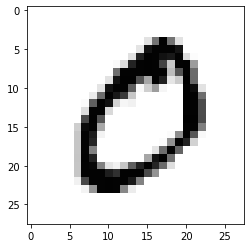

In [3]:
img = train_data[:, 1:][1].reshape((image_size, image_size))
plt.imshow(img, cmap="Greys")
plt.show()

In [4]:
# Extracting the features and labels from the dataset and shortening the dataset to 10,000 datapoints
train_data_features = train_data[:10000, 1:]
train_data_labels = train_data[:10000, :1].reshape(10000,)

In [9]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# Using SVD to bring down the dimension to 10
tsvd = TruncatedSVD(n_components=10)
X_SVD = tsvd.fit_transform(train_data_features)

# Further using t-SNE to bring the dimension down to 2
np.random.seed(0)
tsne = TSNE(n_components=2)
train_data_features_reduced = tsne.fit_transform(X_SVD)

KeyboardInterrupt: 

In [7]:
import seaborn as sns
import pandas as pd

# function to help plot the 2-D dataset
def plot2d(X, Y, c1, c2, N):
    lbl1 = f'Component {c1}'
    lbl2 = f'Component {c2}'    
    df = pd.DataFrame({lbl1:X[:N,c1], lbl2:X[:N,c2], 'label':Y[:N]})
    sns.lmplot(data=df, x=lbl1, y=lbl2, fit_reg=False, hue='label', scatter_kws={'alpha':0.5})   

In [8]:
plot2d(train_data_features_reduced, train_data_labels, 0, 1, N=2000)

NameError: name 'train_data_features_reduced' is not defined

In [6]:
zero_datapoints = []
one_datapoints = []
for i in range(10000):
    if train_data_labels[i] == 0:                   # extracting zeros
        zero_datapoints.append(train_data_features_reduced[i])

for i in range(10000):
    if train_data_labels[i] == 1:                   # extracting ones
        one_datapoints.append(train_data_features_reduced[i])
        
zero_datapoints = np.array(zero_datapoints)
one_datapoints = np.array(one_datapoints)

def normalize(arr, max_val, n):
    a = np.divide(arr, max_val)
    return a + n

zero_datapoints_normalized = normalize(zero_datapoints, 100, 1)
one_datapoints_normalized = normalize(one_datapoints, 100, 1)

NameError: name 'train_data_features_reduced' is not defined

## 2. Classification on a Quantum Computer 

In [10]:
from qiskit import *
import numpy as np

import time
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import VQC

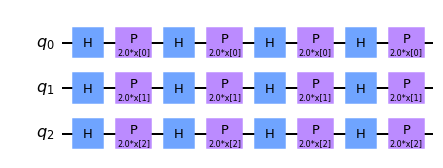

In [11]:
feature_dim = 3     # equal to the dimension of the data

Z_feature_map = ZFeatureMap(feature_dimension=feature_dim, reps=4)
Z_feature_map.draw('mpl')

In [12]:
print("parameters of the Z Feature Map are: {}".format(Z_feature_map.parameters))

parameters of the Z Feature Map are: {Parameter(x[2]), Parameter(x[1]), Parameter(x[0])}


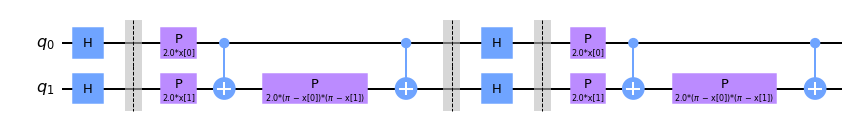

In [13]:
feature_dim = 2

ZZ_feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, insert_barriers=True)
ZZ_feature_map.draw('mpl')

In [14]:
print("parameters of the Z Feature Map are: {}".format(ZZ_feature_map.parameters))

parameters of the Z Feature Map are: {Parameter(x[0]), Parameter(x[1])}


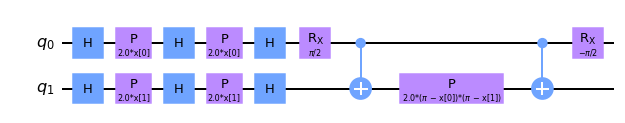

In [15]:
feature_dim = 2

pauli_feature_map = PauliFeatureMap(feature_dimension=feature_dim, reps=1, paulis = ['Z','X','ZY'])
pauli_feature_map.draw('mpl')

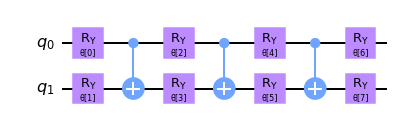

In [17]:
from qiskit.circuit.library import RealAmplitudes

num_qubits = 2

classifier_circ = RealAmplitudes(num_qubits, entanglement='full', reps=3)
classifier_circ.draw('mpl')

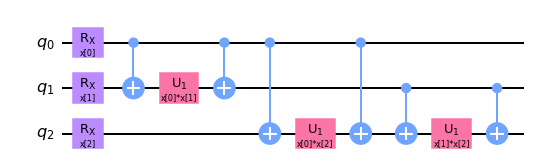

In [19]:
from qiskit.circuit import QuantumCircuit, ParameterVector

num_qubits = 3            
reps = 1              # number of times you'd want to repeat the circuit

x = ParameterVector('x', length=num_qubits)  # creating a list of Parameters
custom_circ = QuantumCircuit(num_qubits)

# defining our parametric form
for _ in range(reps):
    for i in range(num_qubits):
        custom_circ.rx(x[i], i)
    for i in range(num_qubits):
        for j in range(i + 1, num_qubits):
            custom_circ.cx(i, j)
            custom_circ.u1(x[i] * x[j], j)
            custom_circ.cx(i, j)
            
custom_circ.draw('mpl')

In [20]:
train_size = 20
test_size = 10
dp_size_zero = 5
dp_size_one = 5

zero_train = zero_datapoints_normalized[:train_size]
one_train = one_datapoints_normalized[:train_size]

zero_test = zero_datapoints_normalized[train_size + 1:train_size + test_size + 1]
one_test = one_datapoints_normalized[train_size + 1:train_size + test_size + 1]

training_input = {'A':zero_train, 'B':one_train}
test_input = {'A':zero_test, 'B':one_test}

# datapoints is our validation set
datapoints = []
dp_zero = zero_datapoints_normalized[train_size + test_size + 2:train_size + test_size + 2 + dp_size_zero]
dp_one = one_datapoints_normalized[train_size + test_size + 2:train_size + test_size + 2 + dp_size_one]
datapoints.append(np.concatenate((dp_zero, dp_one)))
dp_y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
datapoints.append(dp_y)

class_to_label = {'A': 0, 'B': 1}

NameError: name 'zero_datapoints_normalized' is not defined

**Instantiate the Feature map to use:**

In [21]:
seed = 10598
feature_dim = zero_train.shape[1]

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
feature_map.draw()

NameError: name 'zero_train' is not defined

**Instantiate the Classical Optimizer to use:**

In [21]:
from qiskit.aqua.components.optimizers import COBYLA

cobyla = COBYLA(maxiter=500, tol=0.001)

**Instantiate the variational Circuit to use:**

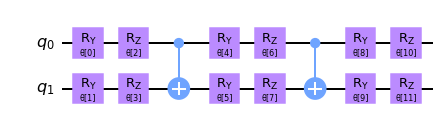

In [22]:
from qiskit.circuit.library import EfficientSU2, RealAmplitudes

var = EfficientSU2(feature_dim, reps=2)
var.draw('mpl')

Constructing a callback function to get the parameter values after each iteration. This step is optional but highly recommended to see if the algorithm is working and is optimizing your parameters as you'd expect it to. 

In [23]:
def call_back_vqc(eval_count, var_params, eval_val, index):
    print("eval_count: {}".format(eval_count))
    print("var_params: {}".format(var_params))
    print("eval_val: {}".format(eval_val))
    print("index: {}".format(index))

**Bringing everything together**

In [24]:
# initilizing our backend
backend = BasicAer.get_backend('qasm_simulator')
backend_options = {"method": "statevector"}

# creating a quantum instance
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed, backend_options=backend_options)

#initilizing our VQC object
vqc = VQC(optimizer=cobyla, feature_map=feature_map, var_form=var, callback=call_back_vqc, training_dataset=training_input, 
         test_dataset=test_input, datapoints=datapoints[0])

In [25]:
start = time.process_time()

result = vqc.run(quantum_instance)

print("time taken: ")
print(time.pr
      - start)


print("testing success ratio: {}".format(result['testing_accuracy']))

eval_count: 0
var_params: [ 0.88004298 -0.78554717  0.39098738 -1.75605972 -0.10027506  0.35802638
 -0.84744026  0.97304489 -1.2689615   0.74384967 -0.36946758  0.23376541]
eval_val: 1.1997311435283133
index: 0
eval_count: 1
var_params: [ 1.88004298 -0.78554717  0.39098738 -1.75605972 -0.10027506  0.35802638
 -0.84744026  0.97304489 -1.2689615   0.74384967 -0.36946758  0.23376541]
eval_val: 0.94955398073038
index: 1
eval_count: 2
var_params: [ 1.88004298  0.21445283  0.39098738 -1.75605972 -0.10027506  0.35802638
 -0.84744026  0.97304489 -1.2689615   0.74384967 -0.36946758  0.23376541]
eval_val: 0.94955398073038
index: 2
eval_count: 3
var_params: [ 1.88004298 -0.78554717  1.39098738 -1.75605972 -0.10027506  0.35802638
 -0.84744026  0.97304489 -1.2689615   0.74384967 -0.36946758  0.23376541]
eval_val: 0.94955398073038
index: 3
eval_count: 4
var_params: [ 1.88004298 -0.78554717  0.39098738 -0.75605972 -0.10027506  0.35802638
 -0.84744026  0.97304489 -1.2689615   0.74384967 -0.36946758  0

AttributeError: module 'time' has no attribute 'pr'

In [36]:
print("prediction of datapoints:")
print("ground truth: {}".format(map_label_to_class_name(datapoints[1], vqc.label_to_class)))
print("prediction:   {}".format(result['predicted_classes']))

prediction of datapoints:
ground truth: ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
prediction:   ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
